## Predicting House Prices for Maple Valley Realty 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Data loading 

In [3]:
data = pd.read_csv(r"C:\Users\Holiness\Downloads\house_price_prediction_dataset.csv")

In [4]:
data.head()

,PropertyID,Location,PropertyType,SizeInSqFt,Bedrooms,Bathrooms,YearBuilt,GarageSpaces,LotSize,NearbySchools,MarketTrend,SellingPrice
0,1,Downtown,Condo,1217.0,2.0,1.0,1959,0,2273.0,4,1,391780.0
1,2,Beachfront,Single Family,2385.0,5.0,3.0,2006,1,1631.0,5,1,1195998.0
2,3,Suburbs,Single Family,2405.0,6.0,3.0,1986,3,3800.0,1,1,736928.0
3,4,Suburbs,Single Family,1790.0,2.0,2.0,2013,1,4347.0,7,1,528240.0
4,5,Downtown,Single Family,2563.0,5.0,2.0,1989,3,3320.0,7,1,958097.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PropertyID     1500 non-null   int64  
 1   Location       1500 non-null   object 
 2   PropertyType   1500 non-null   object 
 3   SizeInSqFt     1425 non-null   float64
 4   Bedrooms       1425 non-null   float64
 5   Bathrooms      1425 non-null   float64
 6   YearBuilt      1500 non-null   int64  
 7   GarageSpaces   1500 non-null   int64  
 8   LotSize        1425 non-null   float64
 9   NearbySchools  1500 non-null   int64  
 10  MarketTrend    1500 non-null   int64  
 11  SellingPrice   1500 non-null   float64
dtypes: float64(5), int64(5), object(2)
memory usage: 140.8+ KB


In [6]:
data.describe()

,PropertyID,SizeInSqFt,Bedrooms,Bathrooms,YearBuilt,GarageSpaces,LotSize,NearbySchools,MarketTrend,SellingPrice
count,1500.000000,1425.000000,1425.000000,1425.000000,1500.00000,1500.000000,1425.000000,1500.000000,1500.000000,1.500000e+03
mean,750.500000,1610.717895,3.082807,1.687719,1985.91800,1.085333,4127.230175,5.695333,-0.003333,5.112892e+05
std,433.157015,664.183550,1.675633,0.782550,20.88149,0.929495,2314.593053,2.288377,0.759632,2.393133e+05
min,1.000000,500.000000,1.000000,1.000000,1950.00000,0.000000,1000.000000,1.000000,-1.000000,1.217560e+05
25%,375.750000,995.000000,1.000000,1.000000,1968.00000,0.000000,2181.000000,4.000000,-1.000000,3.075755e+05
50%,750.500000,1639.000000,3.000000,2.000000,1986.00000,1.000000,3949.000000,6.000000,0.000000,4.583810e+05
75%,1125.250000,2199.000000,4.000000,2.000000,2004.00000,2.000000,5603.000000,7.000000,1.000000,7.017140e+05
max,1500.000000,3060.000000,6.000000,4.000000,2022.00000,3.000000,10458.000000,10.000000,1.000000,1.416213e+06


### Remove Irrelevant Features

In [7]:
data.drop("PropertyID", axis=1, inplace=True)

### Handle Missing Values 

In [8]:
data.isnull().mean()*100

Location         0.0
PropertyType     0.0
SizeInSqFt       5.0
Bedrooms         5.0
Bathrooms        5.0
YearBuilt        0.0
GarageSpaces     0.0
LotSize          5.0
NearbySchools    0.0
MarketTrend      0.0
SellingPrice     0.0
dtype: float64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       1500 non-null   object 
 1   PropertyType   1500 non-null   object 
 2   SizeInSqFt     1425 non-null   float64
 3   Bedrooms       1425 non-null   float64
 4   Bathrooms      1425 non-null   float64
 5   YearBuilt      1500 non-null   int64  
 6   GarageSpaces   1500 non-null   int64  
 7   LotSize        1425 non-null   float64
 8   NearbySchools  1500 non-null   int64  
 9   MarketTrend    1500 non-null   int64  
 10  SellingPrice   1500 non-null   float64
dtypes: float64(5), int64(4), object(2)
memory usage: 129.0+ KB


In [10]:
data["SizeInSqFt"] = data["SizeInSqFt"].fillna(data["SizeInSqFt"].median())
data["Bedrooms"] = data["Bedrooms"].fillna(data["Bedrooms"].median())
data["Bathrooms"] = data["Bathrooms"].fillna(data["Bathrooms"].median())
data["LotSize"] = data["LotSize"].fillna(data["LotSize"].median())

In [11]:
data.isnull().mean()*100

Location         0.0
PropertyType     0.0
SizeInSqFt       0.0
Bedrooms         0.0
Bathrooms        0.0
YearBuilt        0.0
GarageSpaces     0.0
LotSize          0.0
NearbySchools    0.0
MarketTrend      0.0
SellingPrice     0.0
dtype: float64

### Encode Categorical Data 

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
data.head()

,Location,PropertyType,SizeInSqFt,Bedrooms,Bathrooms,YearBuilt,GarageSpaces,LotSize,NearbySchools,MarketTrend,SellingPrice
0,Downtown,Condo,1217.0,2.0,1.0,1959,0,2273.0,4,1,391780.0
1,Beachfront,Single Family,2385.0,5.0,3.0,2006,1,1631.0,5,1,1195998.0
2,Suburbs,Single Family,2405.0,6.0,3.0,1986,3,3800.0,1,1,736928.0
3,Suburbs,Single Family,1790.0,2.0,2.0,2013,1,4347.0,7,1,528240.0
4,Downtown,Single Family,2563.0,5.0,2.0,1989,3,3320.0,7,1,958097.0


In [14]:
encoder = LabelEncoder()

In [15]:
data["Location"] = encoder.fit_transform(data["Location"])
data["PropertyType"] = encoder.fit_transform(data["PropertyType"])

In [16]:
data.head()

,Location,PropertyType,SizeInSqFt,Bedrooms,Bathrooms,YearBuilt,GarageSpaces,LotSize,NearbySchools,MarketTrend,SellingPrice
0,2,0,1217.0,2.0,1.0,1959,0,2273.0,4,1,391780.0
1,0,1,2385.0,5.0,3.0,2006,1,1631.0,5,1,1195998.0
2,3,1,2405.0,6.0,3.0,1986,3,3800.0,1,1,736928.0
3,3,1,1790.0,2.0,2.0,2013,1,4347.0,7,1,528240.0
4,2,1,2563.0,5.0,2.0,1989,3,3320.0,7,1,958097.0


### Scale the Features

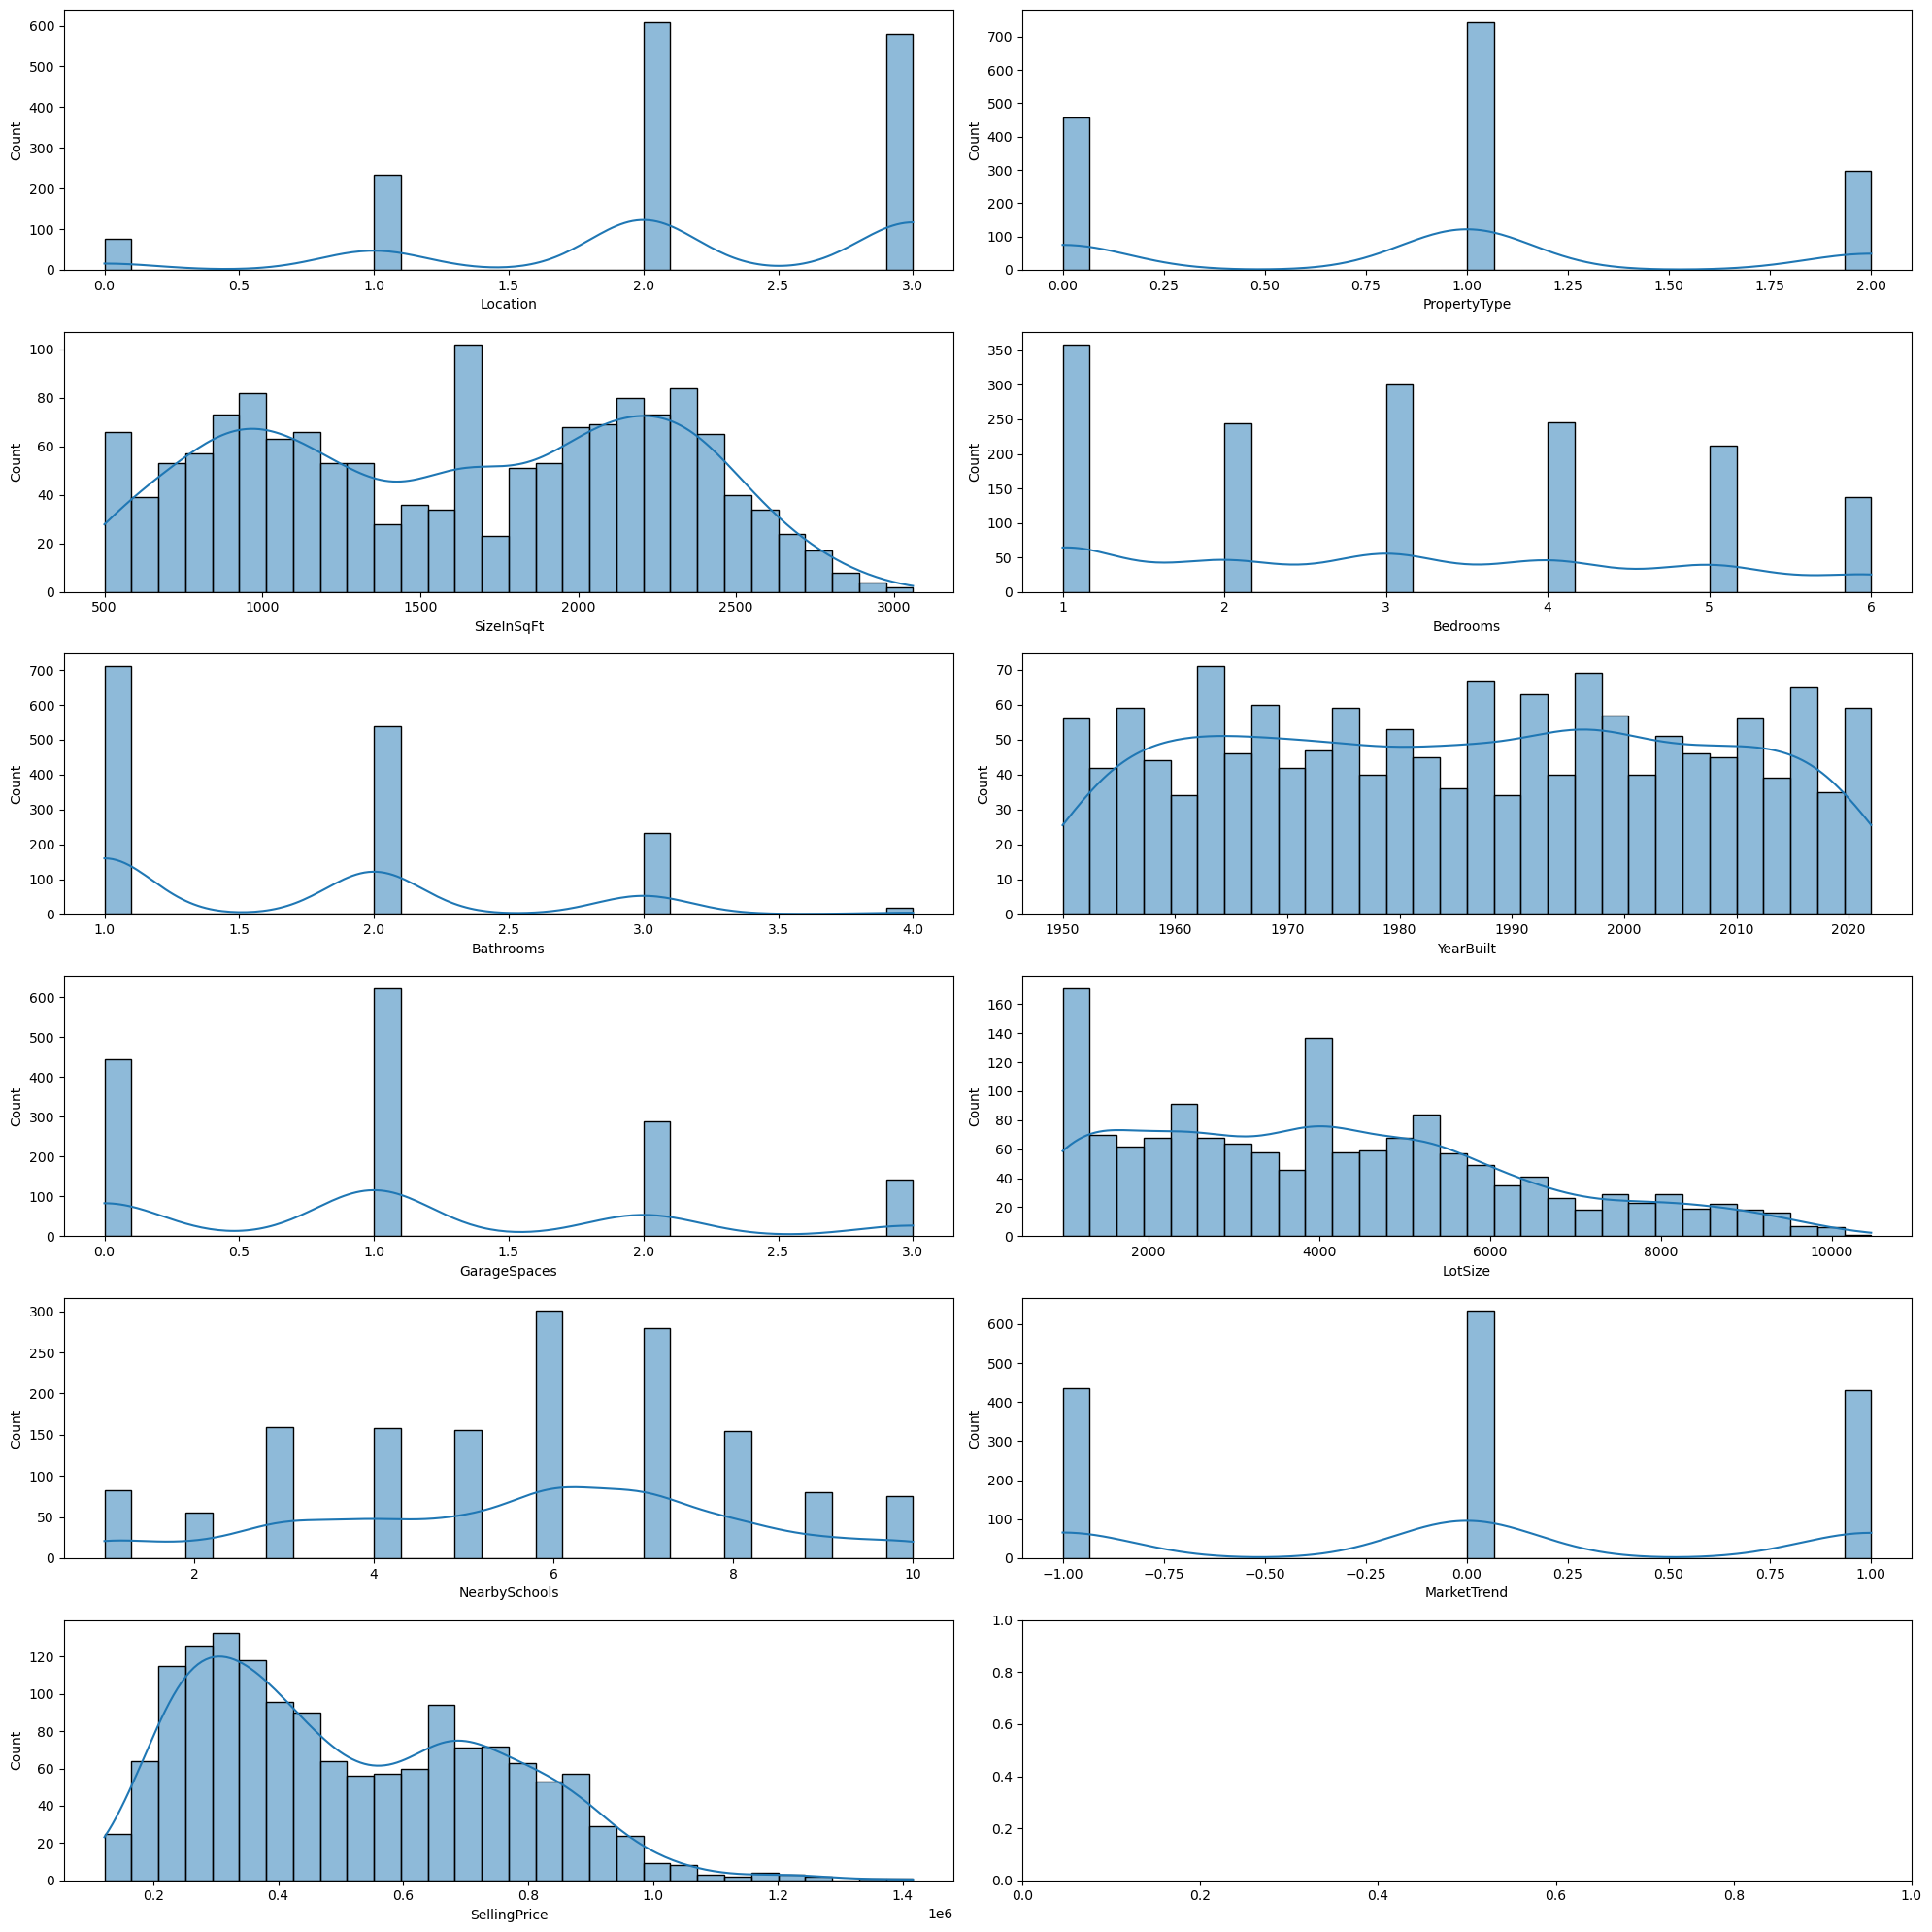

In [22]:
fig, ax = plt.subplots(6, 2, figsize=(20,20))
ax = ax.flatten()

for idx, col in enumerate(data):
    sns.histplot(data[col], kde=True, bins=30, ax=ax[idx])

plt.tight_layout()
plt.show()

In [25]:
data.head(2)

,Location,PropertyType,SizeInSqFt,Bedrooms,Bathrooms,YearBuilt,GarageSpaces,LotSize,NearbySchools,MarketTrend,SellingPrice
0,2,0,1217.0,2.0,1.0,1959,0,2273.0,4,1,391780.0
1,0,1,2385.0,5.0,3.0,2006,1,1631.0,5,1,1195998.0


In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler()

In [26]:
cols_to_scale = ["SizeInSqFt", "YearBuilt", "LotSize"]
data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])

### Define the feautures and target variable 

In [31]:
X = data.drop("SellingPrice", axis=1)
y = data["SellingPrice"]

### Data Splitting 

In [29]:
from sklearn.model_selection import train_test_split 

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

### Modelling 

In [33]:
from sklearn.linear_model import LinearRegression

In [36]:
model = LinearRegression()

In [37]:
model.fit(X_train, y_train)

LinearRegression()

### Coefficient and Intercepts

In [38]:
coef = model.coef_
intercept = model.intercept_
print(f"Coefficients: {coef}")
print(f"Intercept: {intercept}")

Coefficients: [ -14601.62045072   21643.41507943  548093.22995907   32808.05220895
   21988.4740162    21140.17025878   13524.80167377 -401928.68520769
    5496.5495357    11909.85146471]
Intercept: 220017.959023415


#### Result Interpretation:

- Intercept (220,017.95): 

- 

In [39]:
y_pred = model.predict(X_test)

Evaluate the model using common regression metrics: 

- Mean Absolute Error (MAE) 
- Root Mean Squared Error (RMSE)
- r2 Score 

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np 

In [43]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [45]:
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Square Error: {np.sqrt(mse)}")
print(f"R2 Score: {r2}")

Mean Absolute Error: 67620.6744001001
Root Mean Square Error: 90705.0388868256
R2 Score: 0.8673454227156007


### Residual Analysis 

Analyze residuals to assess the model's performance.

In [46]:
residuals = y_test - y_pred

Text(0, 0.5, 'Frequency')

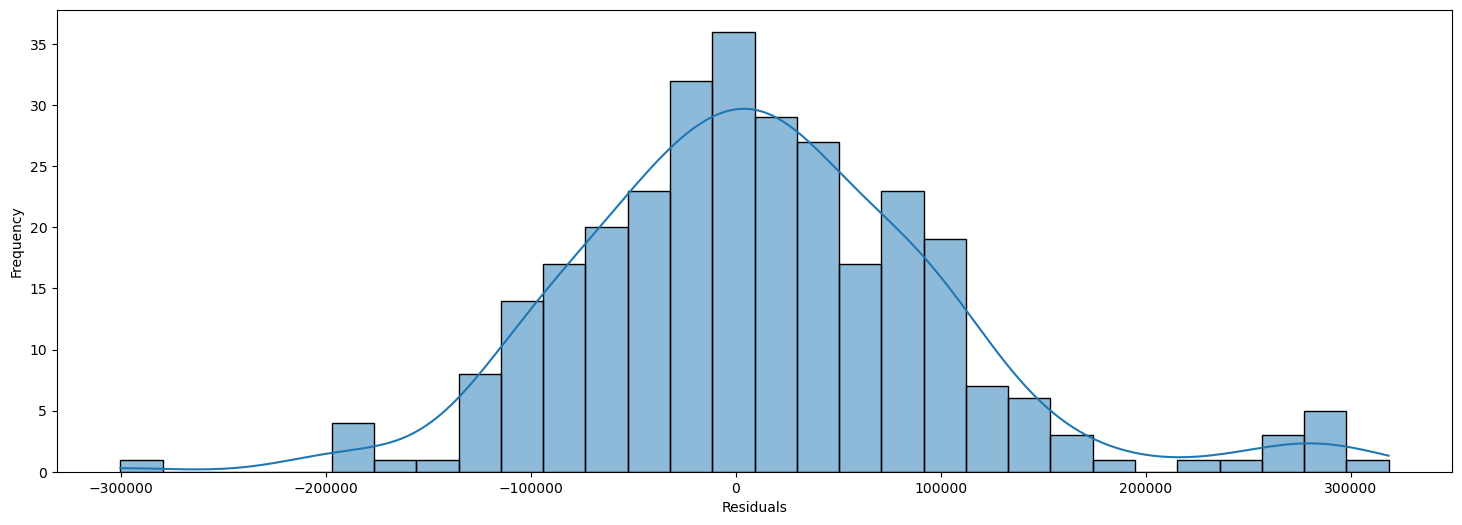

In [47]:
plt.figure(figsize=(18, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel("Residuals")
plt.ylabel("Frequency")

### Feature Importance
For linear regression, feature importance can be interpreted using coefficients. 

In [50]:
feature_importance = pd.DataFrame(
    {'Feature': X.columns, 
    'Importance' : model.coef_}
)

In [51]:
feature_importance

,Feature,Importance
0,Location,-14601.620451
1,PropertyType,21643.415079
2,SizeInSqFt,548093.229959
3,Bedrooms,32808.052209
4,Bathrooms,21988.474016
5,YearBuilt,21140.170259
6,GarageSpaces,13524.801674
7,LotSize,-401928.685208
8,NearbySchools,5496.549536
9,MarketTrend,11909.851465


In [52]:
feature_importance.sort_values(by="Importance", ascending=False)

,Feature,Importance
2,SizeInSqFt,548093.229959
3,Bedrooms,32808.052209
4,Bathrooms,21988.474016
1,PropertyType,21643.415079
5,YearBuilt,21140.170259
6,GarageSpaces,13524.801674
9,MarketTrend,11909.851465
8,NearbySchools,5496.549536
0,Location,-14601.620451
7,LotSize,-401928.685208
